In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sn

from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [2]:
insurance = pd.read_csv('insurance.csv')
print (insurance)

      age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]


In [3]:
insurance.isnull().any()

age         False
sex         False
bmi         False
children    False
smoker      False
region      False
charges     False
dtype: bool

In [4]:
label_encoder = LabelEncoder()

categorical_features = ["sex"]
for feature in categorical_features:
    print(insurance[feature].unique())
    insurance[feature]=label_encoder.fit_transform(insurance[feature])
    print(insurance[feature].unique())

['female' 'male']
[0 1]


In [5]:
label_encoder = LabelEncoder()

categorical_features = ["smoker"]
for feature in categorical_features:
    print(insurance[feature].unique())
    insurance[feature]=label_encoder.fit_transform(insurance[feature])
    print(insurance[feature].unique())

['yes' 'no']
[1 0]


In [6]:
label_encoder = LabelEncoder()

categorical_features = ["region"]
for feature in categorical_features:
    print(insurance[feature].unique())
    insurance[feature]=label_encoder.fit_transform(insurance[feature])
    print(insurance[feature].unique())

['southwest' 'southeast' 'northwest' 'northeast']
[3 2 1 0]


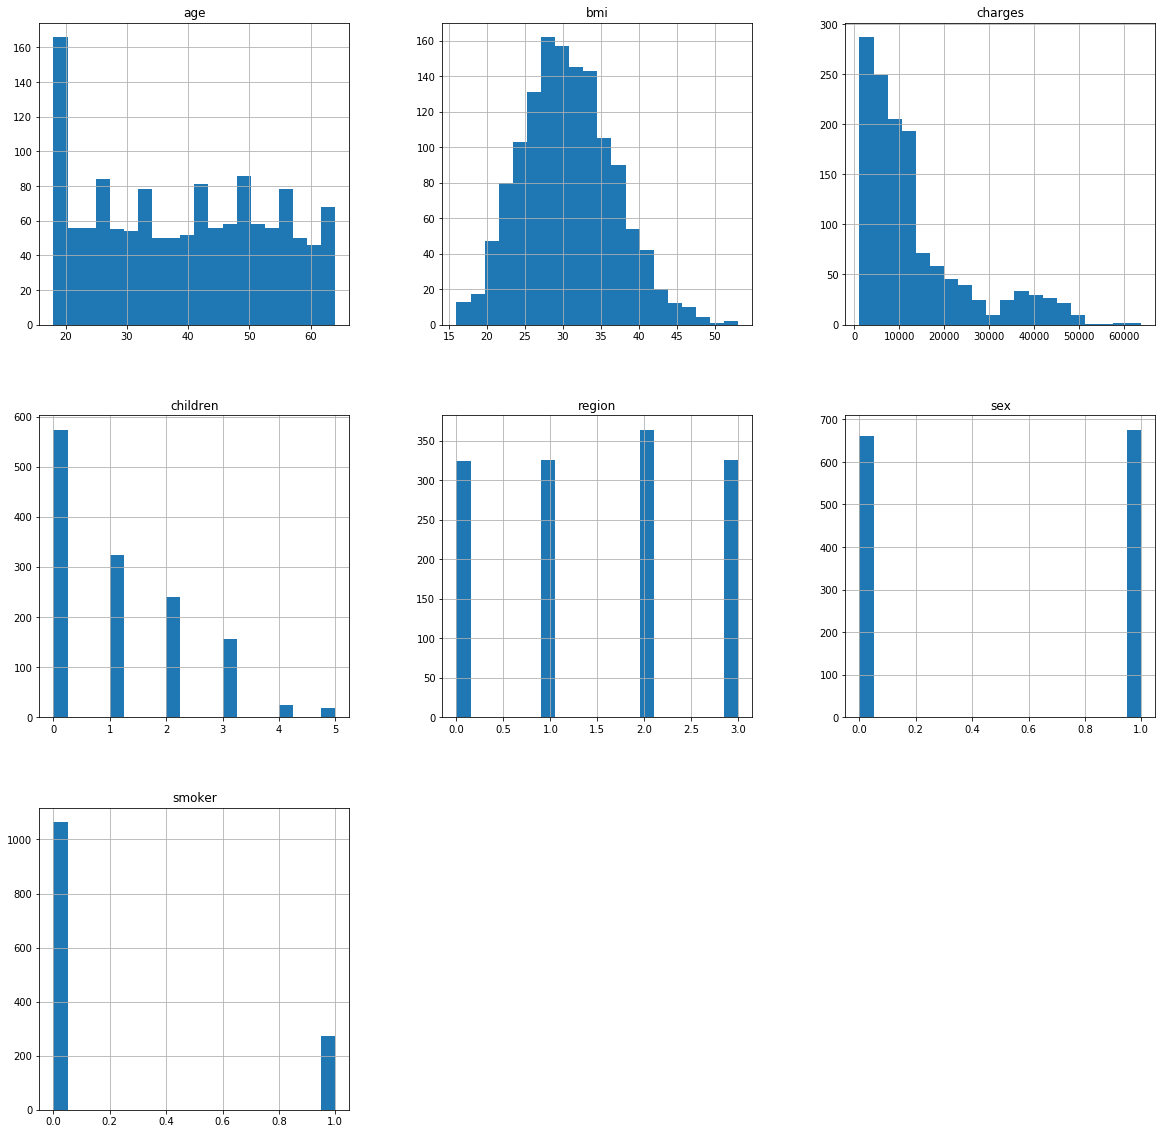

In [7]:
insurance.hist(bins=20, figsize = (20, 20))
plt.show()

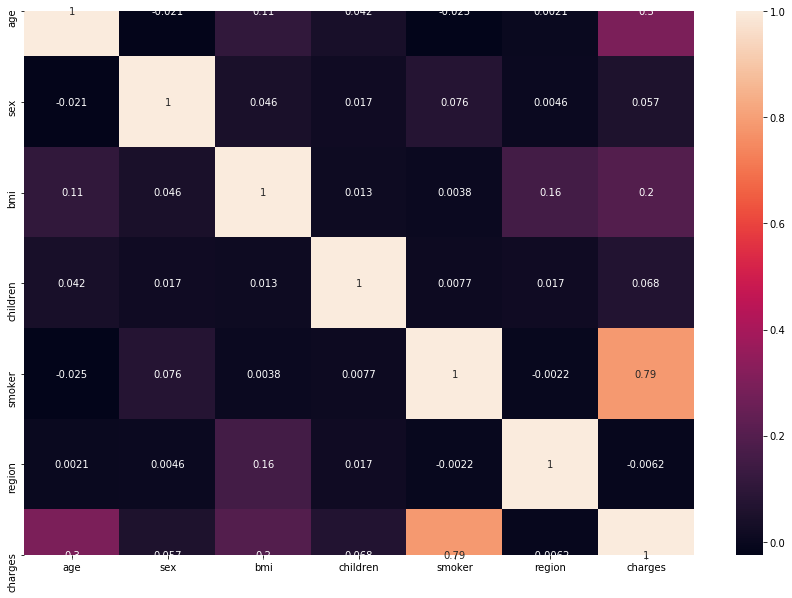

smoker      1.000000
charges     0.787251
sex         0.076185
children    0.007673
bmi         0.003750
region     -0.002181
age        -0.025019
Name: smoker, dtype: float64

In [8]:
#Графік попарної кореляції

fig, ax = plt.subplots(figsize=(15,10))

corrMatrix = insurance.corr()
sn.heatmap(corrMatrix, annot=True)
plt.show()
corrMatrix["smoker"].sort_values(ascending=False)

In [9]:
print('Видаляємо із датасета стовпці "bmi" та "region", бо їх кореляція по модулю < 0.004')

Видаляємо із датасета стовпці "bmi" та "region", бо їх кореляція по модулю < 0.004


In [10]:
insurance = insurance.drop(['bmi'],axis = 1)
insurance = insurance.drop(['region'],axis = 1)

print(insurance)

      age  sex  children  smoker      charges
0      19    0         0       1  16884.92400
1      18    1         1       0   1725.55230
2      28    1         3       0   4449.46200
3      33    1         0       0  21984.47061
4      32    1         0       0   3866.85520
...   ...  ...       ...     ...          ...
1333   50    1         3       0  10600.54830
1334   18    0         0       0   2205.98080
1335   18    0         0       0   1629.83350
1336   21    0         0       0   2007.94500
1337   61    0         0       1  29141.36030

[1338 rows x 5 columns]


In [11]:
Y = insurance['smoker']
X = insurance.drop(['smoker'],axis = 1)

In [12]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.5, random_state=0)

In [13]:
for element in ['linear', 'poly', 'rbf', 'sigmoid']:
    if element == 'linear':
        clf = SVC(kernel = element, gamma = 'auto')
    else:
        clf = SVC(kernel = element, gamma = 'scale')
    clf.fit(X_train, Y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(Y_test, y_pred)
    print ('kernel: ', element)
    print ('accuracy = ', accuracy)

kernel:  linear
accuracy =  0.9431988041853513
kernel:  poly
accuracy =  0.9133034379671151
kernel:  rbf
accuracy =  0.922272047832586
kernel:  sigmoid
accuracy =  0.7115097159940209
